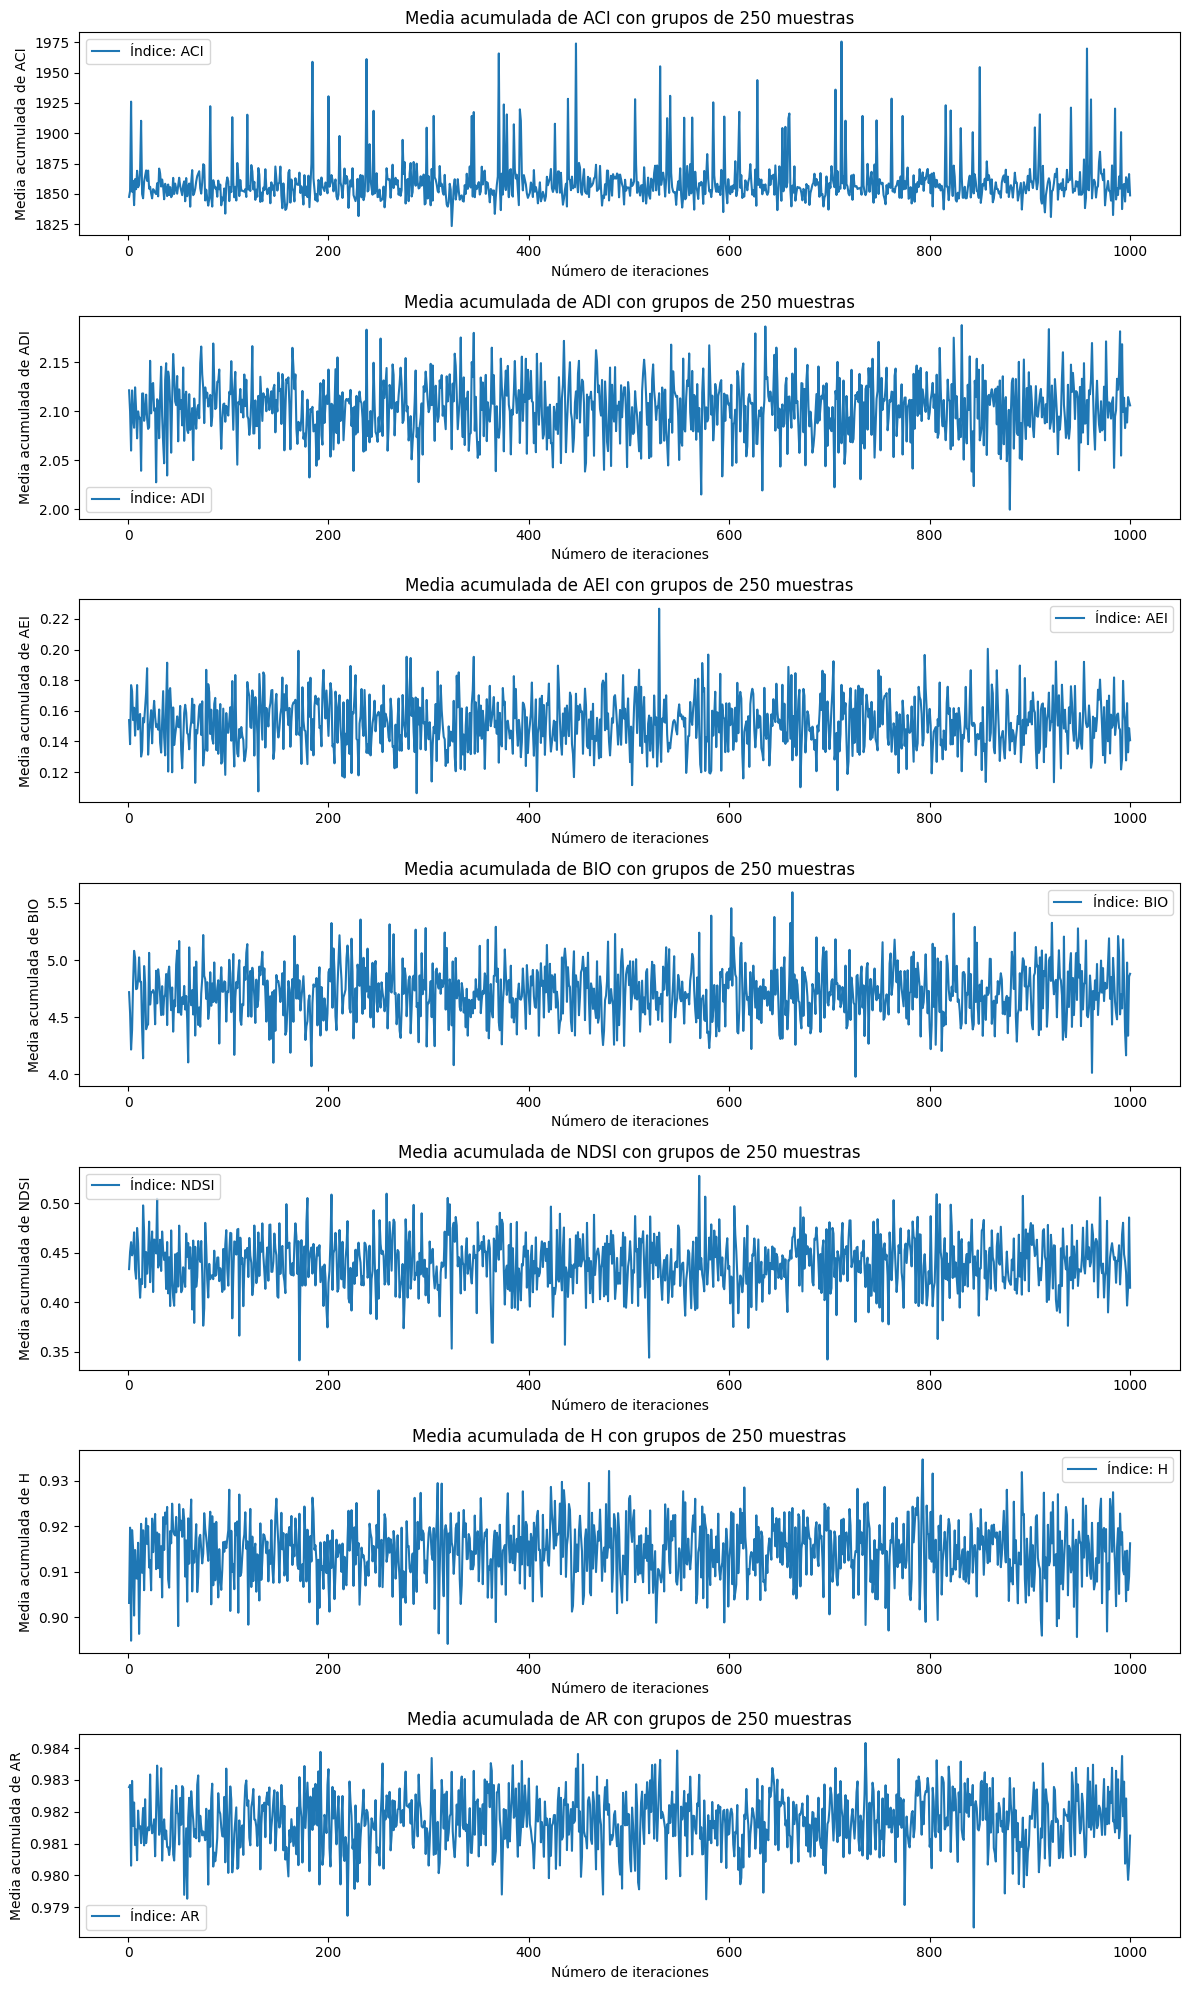

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Conectar a la base de datos SQLite y extraer la tabla "audio_metadata" (solo los registros procesados)
db_path = "../../db/audio_metadata.db"
conn = sqlite3.connect(db_path)
df = pd.read_sql_query("SELECT * FROM audio_metadata WHERE processed = TRUE", conn)
conn.close()

# Convertir la columna "datetime" a tipo datetime, si existe
if "datetime" in df.columns:
    df["datetime"] = pd.to_datetime(df["datetime"])

# Lista de índices a evaluar
indices = ["ACI", "ADI", "AEI", "BIO", "NDSI", "H", "AR"]

# Número de muestras a considerar para cada acumulado
n_samples = len(df)
iterations = 1000  # Número de iteraciones para acumular la media
sample_size = 250  # Tamaño de cada muestra

# Crear una figura para los gráficos con más altura
plt.figure(figsize=(12, 20))  # Ajustar para que los gráficos sean más altos

# Iterar sobre los índices
for idx, index in enumerate(indices):
    mean_accumulated = []

    # Acumulando la media muestral para cada iteración
    for i in range(1, iterations + 1):
        # Seleccionar una muestra aleatoria de tamaño "sample_size"
        sample = df.sample(n=sample_size)
        # Calcular la media del índice para esa muestra
        mean_value = sample[index].mean()
        # Acumular la media
        mean_accumulated.append(mean_value)

    # Graficar la media acumulada para el índice actual con seaborn
    plt.subplot(len(indices), 1, idx + 1)
    sns.lineplot(x=range(1, iterations + 1), y=mean_accumulated, label=f"Índice: {index}")
    plt.xlabel('Número de iteraciones')
    plt.ylabel(f'Media acumulada de {index}')
    plt.title(f'Media acumulada de {index} con grupos de {sample_size} muestras')
    plt.legend()

# Ajustar y mostrar los gráficos
plt.tight_layout()
plt.show()